#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading a dataset
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Here,we got dependent variable as "Churn" column which consists of "YES" or "NO" values.

In [3]:
#to check how many rows and columns in dataframe
df.shape

(7043, 21)

In [4]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [5]:
df.duplicated().sum()  #to check with duplicate records

0

In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

there are more records on "NO"

In [7]:
#to get statistics information
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


with above information,we can observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [8]:
#to check whether any null values present in dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we can see there no missing values in any column.

## EDA

Text(0.5, 1.0, 'histogram of Churn')

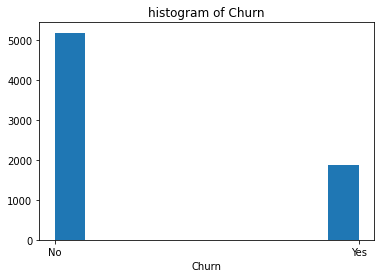

In [9]:
#visualize "Churn" with histogram

plt.hist(df['Churn'])
plt.xlabel('Churn')
plt.title('histogram of Churn')

we can clearly see that "NO" values are more occuring then "YES" values. SO,we can deal with this kind of imbalanced data by using a F1-score as our metrics evaluation method while training the model

In [10]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

In [12]:
len(df['customerID'].unique())

7043

So,we can clearly see that customerID column has unique values for all rows which won't contribute much in building a model.
So,we can remove this column.

In [13]:
df = df.drop(["customerID"],axis=1)

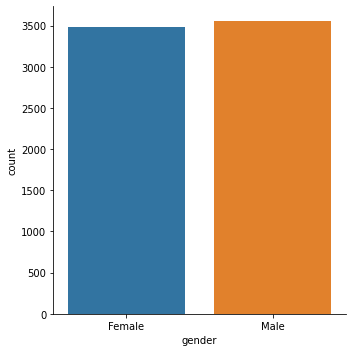

In [15]:
sns.factorplot('gender', data=df, kind="count") ## Let's check Gender

So,for both male and female have same reords.

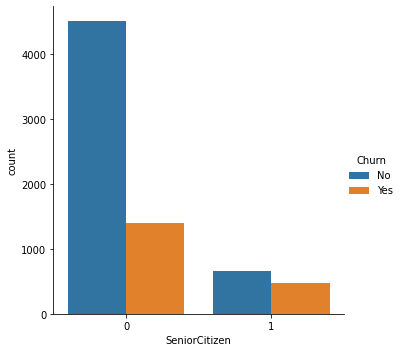

In [17]:
sns.factorplot('SeniorCitizen', data=df, kind="count", hue='Churn')

So,mostly seniour citizen people have almost same intention for both "YES" and "NO" to Churn.

But other then Senior citizen people have mostly intended to say "NO" to Churn rather then saying "YES" to churn.

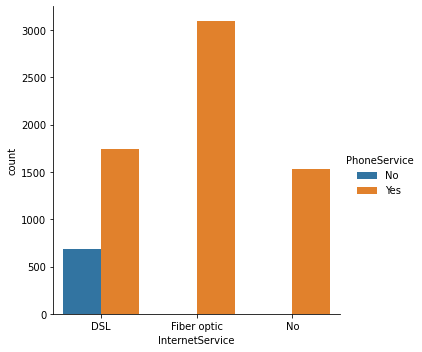

In [25]:
sns.factorplot('InternetService', data=df, kind="count", hue='PhoneService')

So,mostly those who have phone service also have internet service of "Fiber optic".

And those who don't have a Phoneservice they usually go "DSL" as their Internet service.

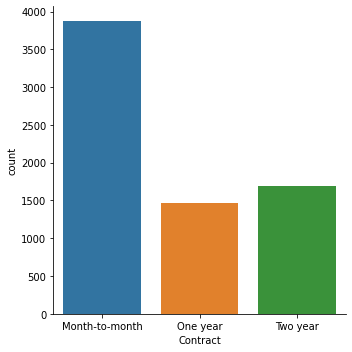

In [29]:
sns.factorplot('Contract', data=df, kind="count") 

So,most of them have a contract of month-to-month.

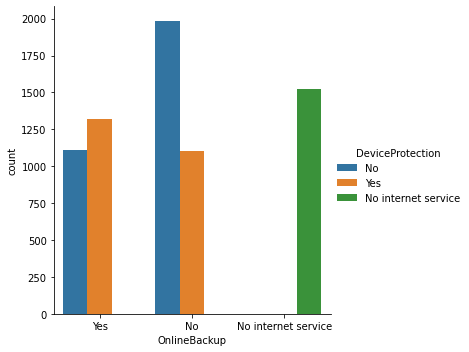

In [31]:
sns.factorplot('OnlineBackup', data=df, kind="count", hue='DeviceProtection')

SO,Most of people who didn't had Device protection they also didn't had Online backup as well.

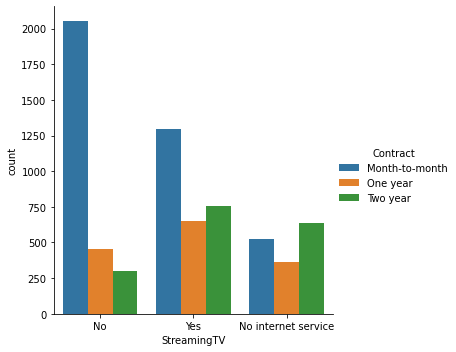

In [33]:
sns.factorplot('StreamingTV', data=df, kind="count", hue='Contract')

So,most of people who didn't had no internet service they mostly likely to have a contract of Two year.

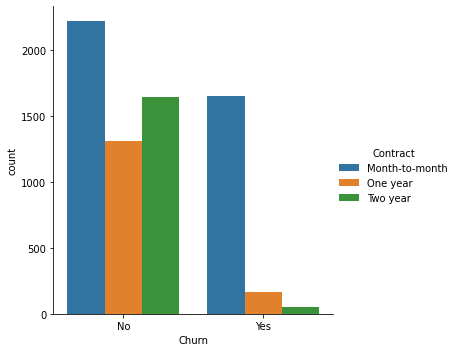

In [34]:
sns.factorplot('Churn', data=df, kind="count", hue='Contract')

So,those people who had a contract of One year/Two year they most likely are saying "NO" Churn.

In [38]:
#Since there are objective type columns,so we can use Label encoder method.

from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['Partner'] = LabelEncoder().fit_transform(df['Partner'])
df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
df['MultipleLines'] = LabelEncoder().fit_transform(df['MultipleLines'])
df['InternetService'] = LabelEncoder().fit_transform(df['InternetService'])
df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = LabelEncoder().fit_transform(df['OnlineBackup'])

df['DeviceProtection'] = LabelEncoder().fit_transform(df['DeviceProtection'])
df['TechSupport'] = LabelEncoder().fit_transform(df['TechSupport'])
df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
df['Contract'] = LabelEncoder().fit_transform(df['Contract'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])

df['PaymentMethod'] = LabelEncoder().fit_transform(df['PaymentMethod'])
df['TotalCharges'] = LabelEncoder().fit_transform(df['TotalCharges'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


So,now there are no objective type columns present in dataframe.

## Correlation

In [40]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


In [41]:
#with target variable
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

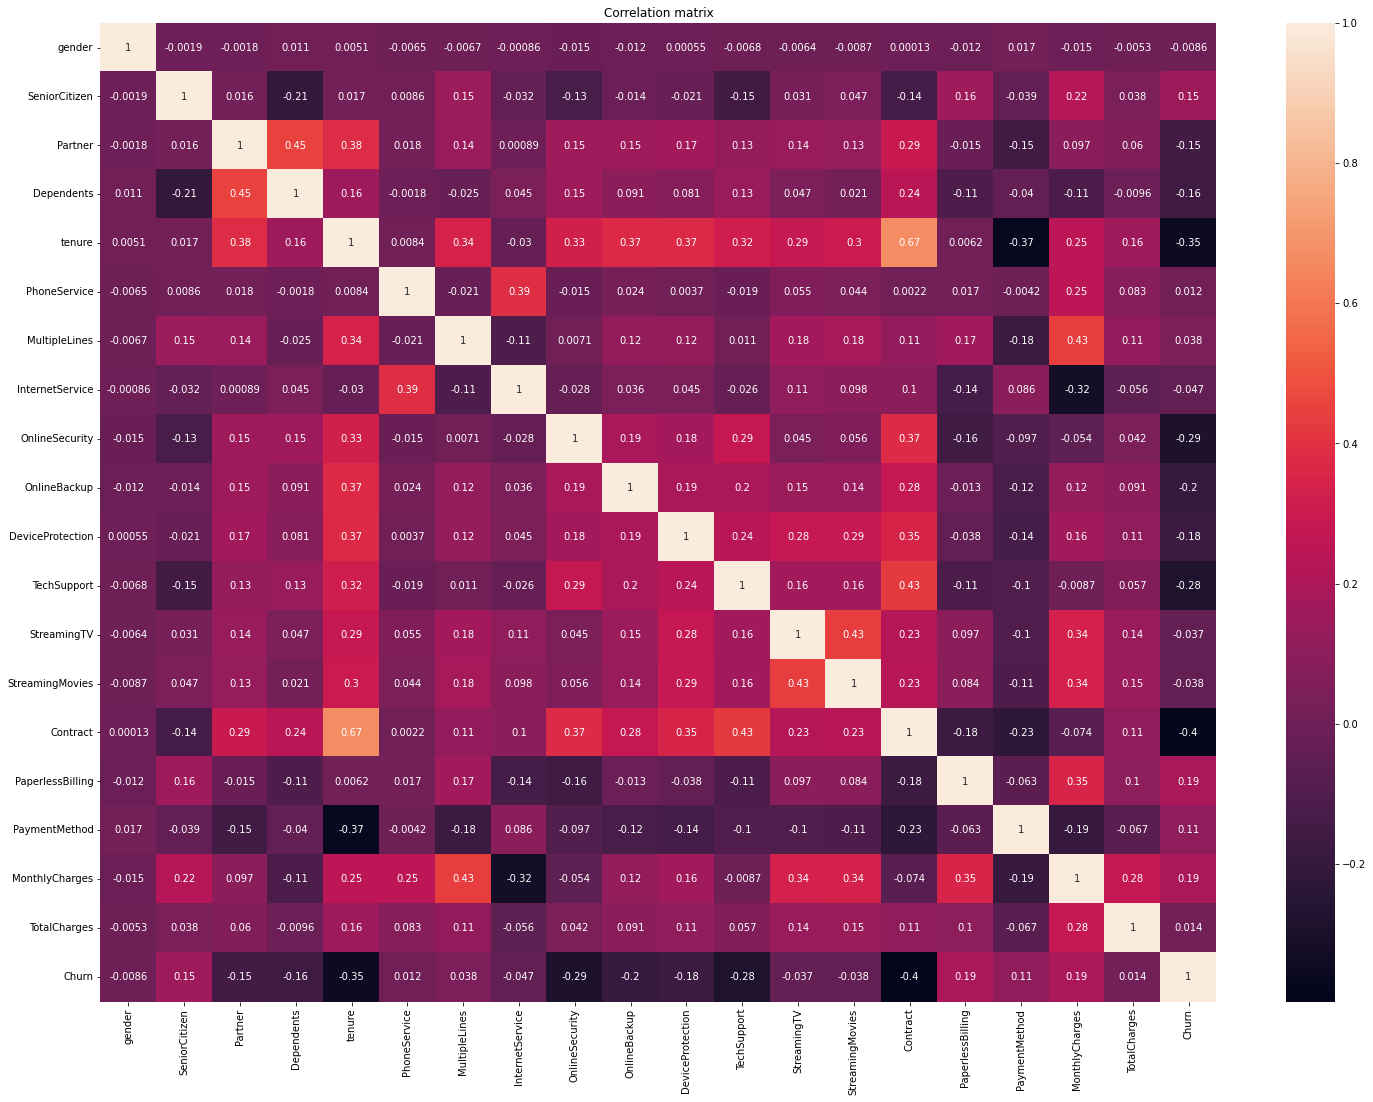

In [42]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[25,18])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### with this,there are both positive and negativs correlations with target variable,
#### "Contract" has highest negative correlation(40%) with target variable.
#### "gender" has least negative correlation(<1%).
#### columns like "PaperlessBilling" and "MonthlyCharges" have highest positivr correlation(19%) with target variable.
#### columns like "MultipleLines","TotalCharges" and "PhoneService" has least positive correlation(<5%).



## Checking with outliers

In [43]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:16]
df3 = df.iloc[:,16:]

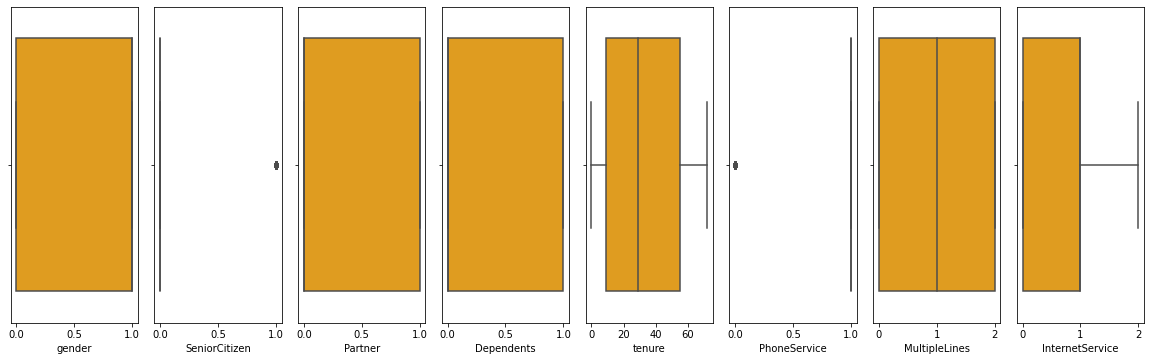

In [44]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

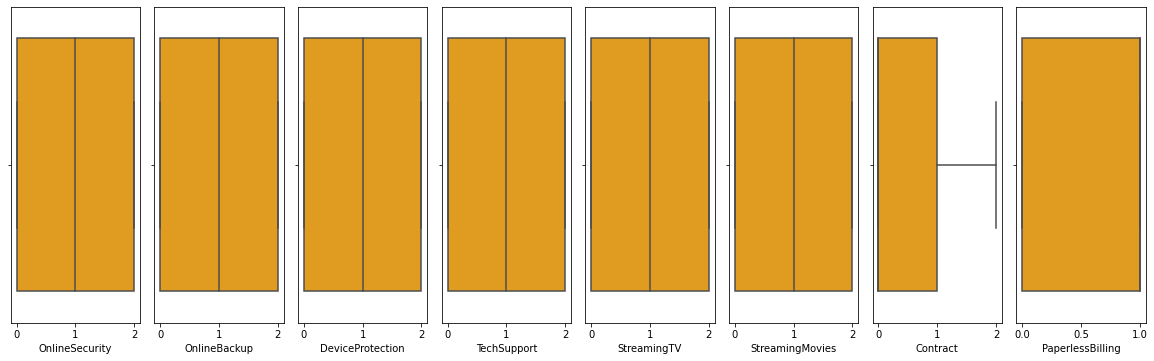

In [45]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

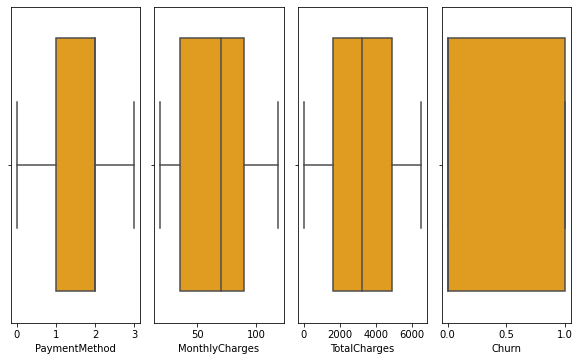

In [46]:
column_list = df3.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,just the outliers present in columns such as "SeniorCitzen" and "PhoneService".

## checking with Skewness

In [47]:
df.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
TotalCharges        0.015857
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

So,there is more skewness in "PhoneService" and "SeniorCitizen" compared to other columns.

In [50]:
#With above all observations,we can clearly see that these two columns "PhoneService" and "SeniorCitizen" have least correlation with
#target variable and consisting of more outliers also these columns have a more skewness in it.
#By this these columns are not much able to contribute in building a model,so we can neglect these columns by removing it.

#So,we can drop these two columns from dataframe.
df = df.drop(["SeniorCitizen","PhoneService"],axis = 1)

## Removing the outliers

In [51]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(7043, 18)

In [52]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 18)
(7043, 18)


So,clearly there are no ouliers present by this we dont have to remove any records.

## Dividing the data into features and vectors

In [53]:
y = df_new[["Churn"]]
x = df_new.drop(["Churn"],axis=1)

## Checking with multicollinearity


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
calc_vif_value(x)

,variables,VIF
0,gender,1.914173
1,Partner,2.789483
2,Dependents,1.877976
3,tenure,7.451513
4,MultipleLines,2.671018
5,InternetService,2.422215
6,OnlineSecurity,2.228043
7,OnlineBackup,2.436113
8,DeviceProtection,2.617899
9,TechSupport,2.354972


So,all values are in desirable range.

## Transforming data to eliminate skewness

In [56]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[-1.00955867,  1.03453023, -0.65401193, -1.6443435 ,  0.33458513,
        -1.25256794, -0.97719949,  1.16193616, -1.07701219, -0.98322672,
        -1.15152597, -1.15823949, -0.88852373,  0.8297975 ,  0.40968472,
        -1.1585412 , -0.28254766],
       [ 0.99053183, -0.96662231, -0.65401193,  0.29720527, -1.01501452,
        -1.25256794,  1.25870222, -1.07880023,  1.16353868, -0.98322672,
        -1.15152597, -1.15823949,  0.79042388, -1.20511329,  1.31889872,
        -0.23949171, -0.88438245],
       [ 0.99053183, -0.96662231, -0.65401193, -1.49544443, -1.01501452,
        -1.25256794,  1.25870222,  1.16193616, -1.07701219, -0.98322672,
        -1.15152597, -1.15823949, -0.88852373,  0.8297975 ,  1.31889872,
        -0.34266505, -1.93709705],
       [ 0.99053183, -0.96662231, -0.65401193,  0.64632675,  0.33458513,
        -1.25256794,  1.25870222, -1.07880023,  1.16353868,  1.25262474,
        -1.15152597, -1.15823949,  0.79042388, -1.20511329, -1.48983732,
        -0.73107888

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]


array([[-1.00955867,  1.03453023, -0.65401193, -1.6443435 ,  0.33458513,
        -1.25256794, -0.97719949,  1.16193616, -1.07701219, -0.98322672,
        -1.15152597, -1.15823949, -0.88852373,  0.8297975 ,  0.40968472,
        -1.1585412 , -0.28254766],
       [ 0.99053183, -0.96662231, -0.65401193,  0.29720527, -1.01501452,
        -1.25256794,  1.25870222, -1.07880023,  1.16353868, -0.98322672,
        -1.15152597, -1.15823949,  0.79042388, -1.20511329,  1.31889872,
        -0.23949171, -0.88438245],
       [ 0.99053183, -0.96662231, -0.65401193, -1.49544443, -1.01501452,
        -1.25256794,  1.25870222,  1.16193616, -1.07701219, -0.98322672,
        -1.15152597, -1.15823949, -0.88852373,  0.8297975 ,  1.31889872,
        -0.34266505, -1.93709705],
       [ 0.99053183, -0.96662231, -0.65401193,  0.64632675,  0.33458513,
        -1.25256794,  1.25870222, -1.07880023,  1.16353868,  1.25262474,
        -1.15152597, -1.15823949,  0.79042388, -1.20511329, -1.48983732,
        -0.73107888

In [58]:
x_n1 = pd.DataFrame(x) #to check with skewness again
x_n1.skew()

0    -0.019031
1     0.067922
2     0.875199
3    -0.243325
4     0.033697
5    -0.072384
6     0.149362
7    -0.001417
8     0.001051
9     0.139751
10   -0.097211
11   -0.105641
12    0.302174
13   -0.375396
14   -0.207559
15   -0.259035
16   -0.290854
dtype: float64

So,the skewness has been significantly reduced compred to previous values.

## Selecting a best random state

In [59]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.8254080908445706  on Random state  35


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 35)

In [61]:
print(x_train.shape,y_train.shape)

(5634, 17) (5634, 1)


In [62]:
print(x_test.shape,y_test.shape)

(1409, 17) (1409, 1)


In [63]:
# To predict the Loan_status,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_1)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_1)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_1))
print(classification_report(y_test,predic_1))

accuracy_score is 0.825
f1_score is 0.602
[[977  85]
 [161 186]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1062
           1       0.69      0.54      0.60       347

    accuracy                           0.83      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.82      0.83      0.82      1409



In [64]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_2)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_2)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

accuracy_score is 0.730
f1_score is 0.482
[[852 210]
 [170 177]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1062
           1       0.46      0.51      0.48       347

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.74      1409



In [65]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_3)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_3)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

accuracy_score is 0.789
f1_score is 0.547
[[931 131]
 [167 180]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1062
           1       0.58      0.52      0.55       347

    accuracy                           0.79      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [66]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_4)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

accuracy_score is 0.805
f1_score is 0.539
[[973  89]
 [186 161]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1062
           1       0.64      0.46      0.54       347

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



f1_score is high for logistic regression model

## Cross Validation to check with overfitting

In [67]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.8037782679527711


In [68]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.7630256387508871


In [69]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.7208566883347312


In [70]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.7888687374991935


here also,the CV score is more for Logstic regression model. So, I will take my final model as logistic regression model

## Hyper parameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV

params_list = {'penalty':['l1','l2','elasticnet','none'],
               'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
               'multi_class':['auto','ovr','multinomial'],
               'C':[100, 10, 1.0, 0.1, 0.01]
               }
GCV = GridSearchCV(LogisticRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [72]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
print("accuarcy_score is",accuracy_score(y_test,GCV_predic))
print("f1_score is",f1_score(y_test,GCV_predic))

accuarcy_score is 0.8225691980127751
f1_score is 0.5874587458745875


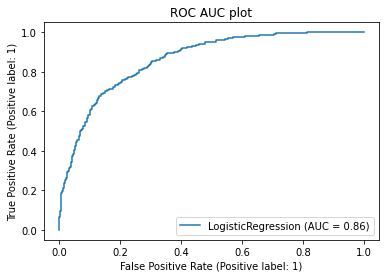

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

from the above graph we got AUC score is 86%

In [74]:
import joblib
joblib.dump(GCV.best_estimator_,"Customer_Churn_Analysis..pkl")

['Customer_Churn_Analysis..pkl']